In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [22]:
df_chile = pd.read_csv('data/chile.list', sep=' ', names=['distance', 'depth'])
df_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  239 non-null    float64
 1   depth     239 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


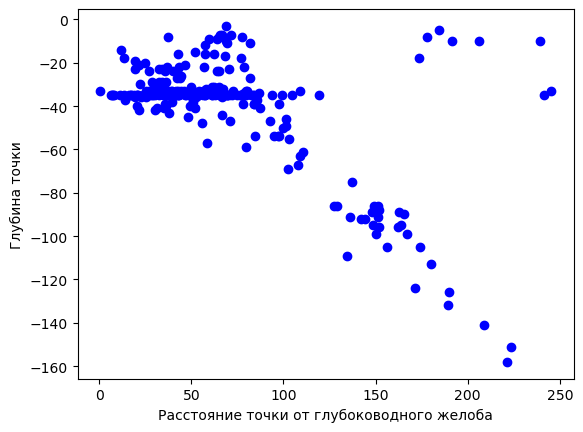

In [23]:
plt.scatter(df_chile.distance, df_chile.depth, color='blue')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки');

In [24]:
std_scaler = StandardScaler()
std_scaler.fit(df_chile)
std_scaled = std_scaler.transform(df_chile)
df_chile[['std_scaled_distance', 'std_scaled_depth']] = std_scaled
df_chile

,distance,depth,std_scaled_distance,std_scaled_depth
0,0.499345,-33,-1.406111,0.304646
1,6.172528,-35,-1.294173,0.229117
2,7.186904,-35,-1.274158,0.229117
3,7.704549,-35,-1.263945,0.229117
4,7.819581,-35,-1.261675,0.229117
...,...,...,...,...
234,221.468527,-158,2.953845,-4.415948
235,223.661983,-151,2.997124,-4.151595
236,239.173042,-10,3.303173,1.173236
237,241.669765,-35,3.352436,0.229117


Коэффициенты: [-0.52816644 -0.34277169]
Свободный член: 0.16247329685161743


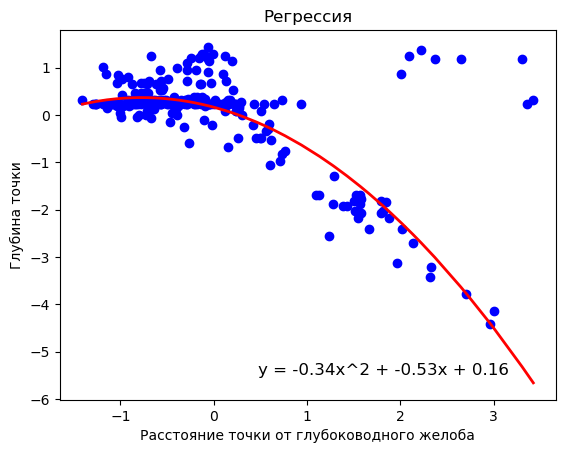

In [25]:
X = df_chile[['std_scaled_distance']]
y = df_chile['std_scaled_depth'].ravel()

degree = 2 
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

huber = HuberRegressor()
huber.fit(X_poly, y)

pred = huber.predict(X_poly)

coefficients = huber.coef_
intercept = huber.intercept_

print("Коэффициенты:", coefficients)
print("Свободный член:", intercept)

formula_text = f'y = {coefficients[1]:.2f}x^2 + {coefficients[0]:.2f}x + {intercept:.2f}'

plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red', linewidth=2)
plt.text(0.40, 0.10, formula_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки')
plt.title('Регрессия')
plt.show();

In [26]:
param_distributions = {
    'epsilon': uniform(1.0, 2.0),
    'max_iter': [100, 200, 300, 400, 500],
    'alpha': uniform(0.0001, 0.01)
}

random_search = RandomizedSearchCV(huber, param_distributions, n_iter=100, cv=5, random_state=42)

random_search.fit(X_poly, y)

print("Лучшие параметры:", random_search.best_params_)

Лучшие параметры: {'alpha': 0.00460499251969543, 'epsilon': 1.026529922319733, 'max_iter': 100}


Коэффициенты: [-0.47011919 -0.36606272]
Свободный член: 0.17353109001500158


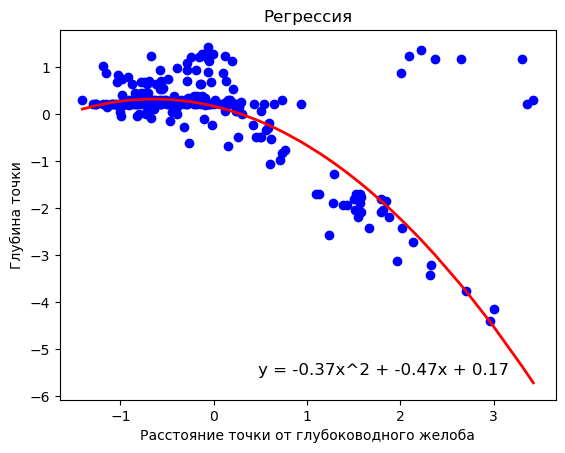

In [27]:
huber = HuberRegressor(alpha=0.00460499251969543, epsilon=1.026529922319733, max_iter=100)
huber.fit(X_poly, y)

pred = huber.predict(X_poly)

coefficients = huber.coef_
intercept = huber.intercept_

print("Коэффициенты:", coefficients)
print("Свободный член:", intercept)

formula_text = f'y = {coefficients[1]:.2f}x^2 + {coefficients[0]:.2f}x + {intercept:.2f}'

plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red', linewidth=2)
plt.text(0.40, 0.10, formula_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Расстояние точки от глубоководного желоба')
plt.ylabel('Глубина точки')
plt.title('Регрессия')
plt.show();